<a href="https://colab.research.google.com/github/bforoura/GenAI/blob/main/Module2/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏞 Convolutional Neural Network

In this notebook, we'll walk through the steps required to train your own convolutional neural network (CNN) on the CIFAR dataset

In [1]:
import numpy as np

from tensorflow.keras import layers, models, optimizers, utils, datasets

## 0. Parameters <a name="parameters"></a>

In [2]:
NUM_CLASSES = 10

## 1. Prepare the Data <a name="prepare"></a>

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [4]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

## **Input Normalization**


* **Batch normalization** layers help normalize the activations within the network, making the training process more stable and faster. However, normalizing the input images before feeding them into the network is still important for several reasons:

* **Consistency**: Normalizing input images ensures that the inputs have a consistent scale, which helps the network learn more effectively.


* **Speed of Convergence**: Normalized inputs can lead to faster convergence during training because the network starts with data on a standard scale.


* **Improved Performance**: Normalizing inputs can help improve the overall performance and accuracy of the model.

## 2. Build the model <a name="build"></a>


* **Leaky ReLU** (Leaky Rectified Linear Unit) is a variant of the **ReLU** (Rectified Linear Unit) activation function. Here's why **Leaky ReLU** is often used:


* **Dying ReLU Problem**: In standard ReLU, if the input to a neuron is negative, the output is zero. If a large number of neurons output zero for a long period during training, they may never activate again. This is known as the "dying ReLU" problem.

* **Leaky ReLU Solution**: Leaky ReLU allows a small, non-zero gradient when the unit is not active. Specifically, it outputs α * x for x < 0 and x for x >= 0, where α (alpha) is a small constant (often 0.01). This small gradient ensures that neurons have a chance to recover during training and continue to update their weights.


* **Standard ReLU**: Can lead to zero gradients when the activation is zero, which means weights of the corresponding neurons are not updated during backpropagation.
Leaky ReLU: Provides a small gradient when the input is negative, ensuring that the backpropagation process can still update the weights, promoting better learning.
Better Performance:

* **Leaky ReLU** has been found to sometimes result in better performance compared to standard ReLU, particularly in deeper networks where the dying ReLU problem can be more pronounced.
Empirical Success:

* In many empirical studies and practical applications, **Leaky ReLU** has shown to improve convergence and achieve higher accuracy compared to standard ReLU, especially in deep learning models.

* The introduction of the negative slope **a** ensures that **Leaky ReLU** never completely dies, thus maintaining a small gradient even for negative inputs.

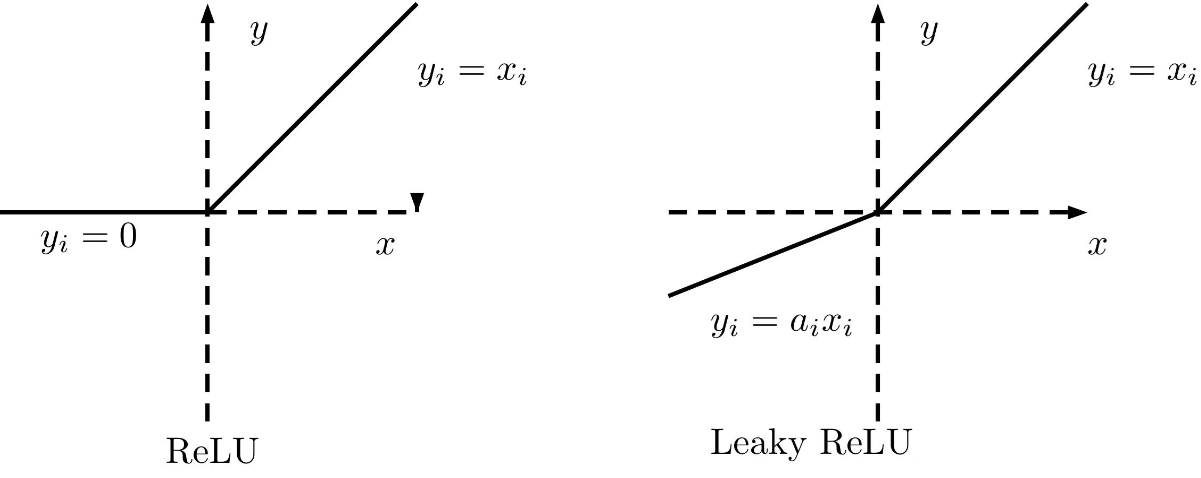

In [5]:
#######################################################################
# The input layer
# This is the shape of the CIFAR-10 images (32x32 pixels with 3 color channels)
input_layer = layers.Input((32, 32, 3))
#######################################################################

#######################################################################
# The first COV2D layer
#######################################################################
# Output shape: (32, 32, 32)
#     32 filters, 3x3 kernel size, stride of 1, and same padding.
#     The spatial dimensions remain the same (32x32), but the depth increases to 32.
x = layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same")(
    input_layer
)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)

#######################################################################
# The second COV2D layer
#######################################################################
# Output shape: (16, 16, 32)
#      32 filters, 3x3 kernel size, stride of 2, and same padding.
#      With a stride of 2, the filter moves 2 pixels at a time, effectively
#      halving the spatial dimensions of the input.
x = layers.Conv2D(filters=32, kernel_size=3, strides=2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)


#######################################################################
# The third COV2D layer
# Output shape: (16, 16, 64)
#      64 filters, 3x3 kernel size, stride of 1, and same padding.
#      The spatial dimensions remain the same, but the depth increases to 64.
#######################################################################
x = layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)


#######################################################################
# The fourth COV2D layer
# Output shape: (8, 8, 64)
#        64 filters, 3x3 kernel size, stride of 2, and same padding.
#        The spatial dimensions are reduced by half again.
#######################################################################
x = layers.Conv2D(filters=64, kernel_size=3, strides=2, padding="same")(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)


#######################################################################
#  Output shape: (4096)
#  Flattens the 8x8x64 tensor into a 4096-dimensional vector.

x = layers.Flatten()(x)
#######################################################################


#######################################################################
# Output shape: (128)
# Fully connected layer with 128 units

x = layers.Dense(128)(x)
x = layers.BatchNormalization()(x)
x = layers.LeakyReLU()(x)
x = layers.Dropout(rate=0.5)(x)


#######################################################################
x = layers.Dense(NUM_CLASSES)(x)
output_layer = layers.Activation("softmax")(x)



#######################################################################
model = models.Model(input_layer, output_layer)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                            

## 3. Train the model <a name="train"></a>

In [10]:
opt = optimizers.Adam(learning_rate=0.0005)
model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

In [11]:
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    shuffle=True,
    validation_data=(x_test, y_test),
)

Epoch 1/10
1563/1563 [==============================] - 36s 22ms/step - loss: 1.5713 - accuracy: 0.4508 - val_loss: 1.1577 - val_accuracy: 0.5892
Epoch 2/10
1563/1563 [==============================] - 32s 21ms/step - loss: 1.1610 - accuracy: 0.5914 - val_loss: 1.0862 - val_accuracy: 0.6132
Epoch 3/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.0074 - accuracy: 0.6475 - val_loss: 0.9126 - val_accuracy: 0.6839
Epoch 4/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9190 - accuracy: 0.6780 - val_loss: 1.0090 - val_accuracy: 0.6548
Epoch 5/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8624 - accuracy: 0.6987 - val_loss: 0.9137 - val_accuracy: 0.6807
Epoch 6/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.8113 - accuracy: 0.7169 - val_loss: 0.8706 - val_accuracy: 0.6988
Epoch 7/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.7642 - accuracy: 0.7350 - val_loss: 0.9633 -

## 4. Evaluation <a name="evaluate"></a>

In [12]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 1s 87ms/step - loss: 0.8189 - accuracy: 0.7204


[0.8188733458518982, 0.7203999757766724]

In [13]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 [==============================] - 2s 6ms/step


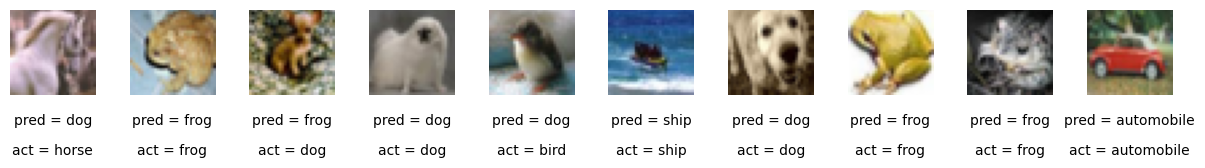

In [14]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)